In [4]:
import sys
sys.path.append('..')

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from utils import utils, cross_validation

In [5]:
nh3_nc = xr.load_dataset('../datasets/CAMS-GLOB-ANT_Glb_0.1x0.1_anthro_nh3_v4.2_monthly_lombardia.nc') # Copernicus (0.1°x0.1°)

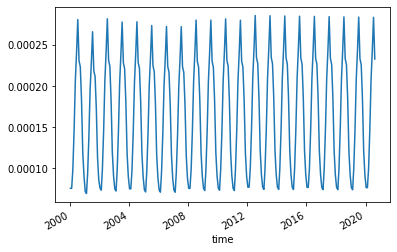

In [17]:
# MAX: lat(45.35 6) lon(10.25 17)
nh3 = utils.xarray2pandas(nh3_nc.agl, 6, 17)
nh3.plot()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import statsmodels as sm
import matplotlib.pyplot as plt
from utils import utils

n = len(nh3_max)
rmse = []
# TODO (AIC; BIC)

for i in range(k - 1):
    start = ((n * (i + 1)) / k )

    # Divide data into two dataset: training and validation
    train_set = nh3_max[0:int(start)].to_period('M')
    validation_set = nh3_max[int(start):int(start+int(n/k))].to_period('M')

    # Model fitting
    #model = sm.tsa.arima.model.ARIMA(train_set, order=(p,d,q))
    model = sm.tsa.statespace.sarimax.SARIMAX(train_set, order=(p,d,q))
    model_fit = model.fit()

    predictions = []
    errors = []

    # Predictions
    for i in range(int(n/k)):
        prediction = model_fit.forecast()
        model_fit = model_fit.append([prediction.values[0]])
        predictions.append(prediction.values[0])
        errors.append(validation_set.values[i] - prediction.values[0])

    if plot is True:
        plt.figure()
        predictions = pd.Series(predictions, index=validation_set.index)
        predictions.plot()
        validation_set.plot()
        plt.show()

    rmse.append(sum(np.array(errors)**2))

In [19]:
train_set, test_set = utils.

time
2000-01-15    0.000076
2000-02-15    0.000076
2000-03-15    0.000099
2000-04-15    0.000146
2000-05-15    0.000206
                ...   
2016-02-15    0.000077
2016-03-15    0.000100
2016-04-15    0.000148
2016-05-15    0.000209
2016-06-15    0.000245
Name: agl, Length: 198, dtype: float64